In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
IMAGE_SIZE = [224, 224]

In [5]:
train_directory='archive/train'
test_directory='archive/test'
val_directory='archive/valid'

In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('archive/train/*')
len(folders)

315

In [10]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
#model object
model = Model(inputs=vgg.input, outputs=prediction)

# the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [14]:
print(len(training_set))
print(len(test_set))

1437
50


In [30]:
pip install --upgrade numpy --user

Note: you may need to restart the kernel to use updated packages.


In [15]:
r =model.fit_generator(
  training_set,validation_data=test_set,epochs=5,
    steps_per_epoch=len(training_set),validation_steps=len(test_set)
)

C:\Users\LENOVO\anaconda3\envs\my_env\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1437/1437 [==============================] - 9383s 6s/step - loss: 5.7582 - accuracy: 0.2590 - val_loss: 2.3788 - val_accuracy: 0.6330
Epoch 2/5
1437/1437 [==============================] - 9228s 6s/step - loss: 2.5173 - accuracy: 0.6270 - val_loss: 2.0673 - val_accuracy: 0.7137
Epoch 3/5
1437/1437 [==============================] - 9231s 6s/step - loss: 2.0495 - accuracy: 0.7047 - val_loss: 2.0219 - val_accuracy: 0.7575
Epoch 4/5
1437/1437 [==============================] - 8602s 6s/step - loss: 1.7105 - accuracy: 0.7554 - val_loss: 1.8688 - val_accuracy: 0.7625
Epoch 5/5
1437/1437 [==============================] - 33016s 23s/step - loss: 1.4652 - accuracy: 0.7891 - val_loss: 2.0188 - val_accuracy: 0.7752


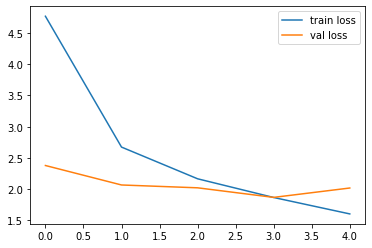

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

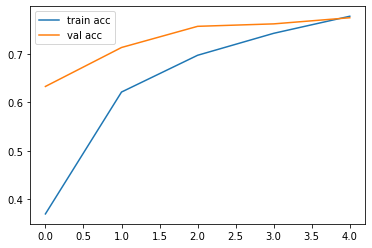

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
model.save('BC.h5')

In [2]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
model1 = load_model('./BC.h5',compile=False) 

In [7]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [8]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

'ALBATROSS'

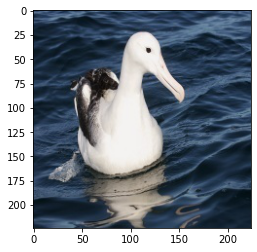

In [12]:
img='archive/one image to test/2.jpg'
pic=load_img('archive/one image to test/2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)